In [1]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [2]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [3]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.

# !!!!! Once you call the coordinates 1 time they delete from memory !!!!!!
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

0

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a817f5c1ef223300bb762d60fbbf393e


In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a817f5c1ef223300bb762d60fbbf393e&q=Boston


In [9]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [12]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":502,"main":"Rain","description":"heavy intensity rain","icon":"10d"},{"id":701,"main":"Mist","description":"mist","icon":"50d"}],"base":"stations","main":{"temp":64.09,"feels_like":64.67,"temp_min":61.74,"temp_max":66.94,"pressure":1019,"humidity":95},"visibility":3219,"wind":{"speed":3,"deg":79,"gust":11.01},"rain":{"1h":1.28},"clouds":{"all":90},"dt":1628172951,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1628156467,"sunset":1628207957},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [13]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 502,
   'main': 'Rain',
   'description': 'heavy intensity rain',
   'icon': '10d'},
  {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}],
 'base': 'stations',
 'main': {'temp': 64.09,
  'feels_like': 64.67,
  'temp_min': 61.74,
  'temp_max': 66.94,
  'pressure': 1019,
  'humidity': 95},
 'visibility': 3219,
 'wind': {'speed': 3, 'deg': 79, 'gust': 11.01},
 'rain': {'1h': 1.28},
 'clouds': {'all': 90},
 'dt': 1628172951,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1628156467,
  'sunset': 1628207957},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [14]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
print(city_weather.json())
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

{'cod': '404', 'message': 'city not found'}
City weather not found.


In [16]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 502,
   'main': 'Rain',
   'description': 'heavy intensity rain',
   'icon': '10d'},
  {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}],
 'base': 'stations',
 'main': {'temp': 64.09,
  'feels_like': 64.67,
  'temp_min': 61.74,
  'temp_max': 66.94,
  'pressure': 1019,
  'humidity': 95},
 'visibility': 3219,
 'wind': {'speed': 3, 'deg': 79, 'gust': 11.01},
 'rain': {'1h': 1.28},
 'clouds': {'all': 90},
 'dt': 1628172951,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1628156467,
  'sunset': 1628207957},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [17]:
# Get the JSON data.
boston_data = city_weather.json()
boston_data.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'rain', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [18]:
boston_data['sys']

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1628156467,
 'sunset': 1628207957}

In [19]:
boston_data['wind'].keys()

dict_keys(['speed', 'deg', 'gust'])

In [20]:
country = boston_data['sys']['country']
country

'US'

In [21]:
date = boston_data['dt']
date

1628172951

In [22]:
boston_data['main'].keys()

dict_keys(['temp', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity'])

In [23]:
lat = boston_data['coord']['lat']
lng = boston_data['coord']['lon']
max_temp = boston_data['main']['temp_max']
humidity = boston_data['main']['humidity']
clouds = boston_data['clouds']['all']
wind = boston_data['wind']['speed']
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 66.94 95 90 3


In [24]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-08-05 14:15:51'

In [26]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime('%x')
today

'08/05/21'

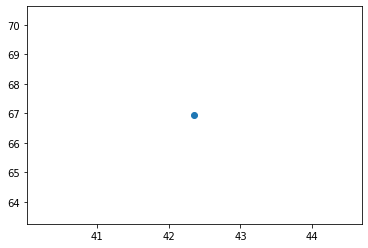

In [28]:
import matplotlib.pyplot as plt
plt.scatter(lat,
           max_temp,)